# Dataset de características
---
Queremos encontrar imágenes que sean parecidas entre si.
Para ello las representamos en un plano 2D y hayamos la distancia
de entre imágenes que sean parecidas.
Para ello tenemos 2 distancias:
- Distancia euclidiana = sqrt(sum(yi-xi)**2)
- Distancia coseno = 1- ((y*x)/||y||*||x||) --> Esta es la que más nos va a interesar para DL

Vamos a entrenar un agente que busque las evoluciones de los pokemons.

In [2]:
import tensorflow as tf

2025-10-08 11:03:43.191985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759921423.595185      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759921423.738883      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#Creamos el modelo base a partir de ResNet101, un modelo ya entrenado
base_model = tf.keras.applications.resnet.ResNet101(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224, 224, 3)
)

I0000 00:00:1759921441.996947      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1759921441.997655      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [5]:
#Instanciamos el modelo nuestro y le aplicamos flatten
model = Sequential()
model.add(base_model)
model.add(Flatten())

In [6]:
import cv2, glob, numpy as np

In [7]:
#Definimos una función que dado un path de una imagen devuelve a cual se parece
def get_convfeatures(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    return model.predict(np.array([img]))

In [8]:
get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/115.jpg")

I0000 00:00:1759921452.559350     101 service.cc:148] XLA service 0x7fac40003190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759921452.560994     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1759921452.561023     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1759921453.806565     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


I0000 00:00:1759921457.331068     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
features = [] #Array de características
names = [] #Array de paths

In [24]:
#Para cada path de imágenes de pokemon
for path in glob.glob("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/*.jpg"):
    #Añadimos sus características y sus paths
    features.append(get_convfeatures(path).reshape(-1))
    names.append(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━

In [26]:
#Los pasamos a numpy arrays
features = np.array(features)
names = np.array(names)

# Cálculo de la imagen más cercana
---

In [58]:
#Este vector va a tener las características convolucionales del pokemon que queremos buscar
input_vector = get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/1.jpg")
input_vector = input_vector.flatten()
print(input_vector)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[0.        0.        0.        ... 0.        0.        1.2661207]


In [59]:
#Importamos scipy para calcular la distancia coseno
from scipy import spatial

In [60]:
#Calculamos la distancia coseno
dist = np.array([spatial.distance.cosine(input_vector, i) for i in features])

In [61]:
#Buscamos la menor distancia (la misma imagen) y la segunda menor distancia (la más parecida)
names[np.argmin(dist)] #La misma imagen (no la que queremos)
#Ordena de menor a mayor y nos da los 3 primeros, la primera será la misma y la segunda será la más cercana
min_index = dist.argsort()[:3]
names[min_index]

array(['/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/1.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/682.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/578.jpg'],
      dtype='<U81')

In [62]:
import matplotlib.pyplot as plt

In [63]:
def imshow(img):
    fig, ax = plt.subplots(1,1, figsize = (4,4))
    ax.imshow(img)
    plt.show()

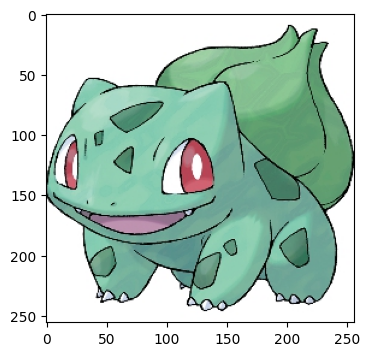

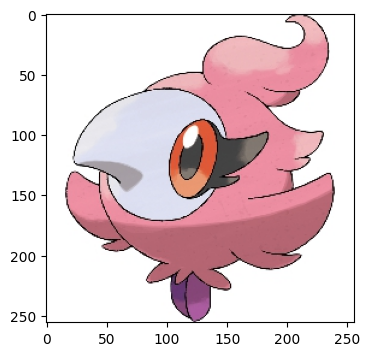

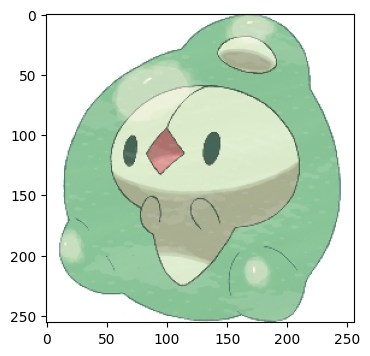

In [64]:
for i in names[min_index]:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imshow(img)